In [1]:
import os
import sys

openai_api_key = os.environ.get("OPENAI_API_KEY")
sys.path.append(r'./scripts/')

In [2]:
from scripts.featherflight import FeatherFlight

ff = FeatherFlight()
ff.calculate_distances_routes()

In [3]:
print(f'The FeatherFlight object was created on the {ff.creation_date}')
print(f'1. It has the airplanes dataset {ff.airplanes.shape}.')
print(f'2. It also has the airports dataset {ff.airports.shape}.')
print(f'3. It also has the airlines dataset {ff.airlines.shape}.')
print(f'4. It also has the routes dataset {ff.routes.shape}.')

The FeatherFlight object was created on the 2024-03-16
1. It has the airplanes dataset (246, 4).
2. It also has the airports dataset (7698, 16).
3. It also has the airlines dataset (6162, 9).
4. It also has the routes dataset (67663, 13).


In [4]:
for df in [ff.airplanes, ff.airports, ff.airlines, ff.routes]:
    print(df.head(3))

   index                                          Name IATA code ICAO code
0      0                       Aerospatiale (Nord) 262       ND2      N262
1      1  Aerospatiale (Sud Aviation) Se.210 Caravelle       CRV      S210
2      2                  Aerospatiale SN.601 Corvette       NDC      S601
   index Airport ID                          Name         City  \
0      0          1                Goroka Airport       Goroka   
1      1          2                Madang Airport       Madang   
2      2          3  Mount Hagen Kagamuga Airport  Mount Hagen   

            Country IATA  ICAO  Latitude   Longitude  Altitude Timezone DST  \
0  Papua New Guinea  GKA  AYGA  -6.08169  145.391998      5282       10   U   
1  Papua New Guinea  MAG  AYMD  -5.20708  145.789001        20       10   U   
2  Papua New Guinea  HGU  AYMH  -5.82679  144.296005      5388       10   U   

  Tz database time zone     Type       Source  \
0  Pacific/Port_Moresby  airport  OurAirports   
1  Pacific/Port_More

### Step 2
With the datasets ready, Alex's next step is to analyze the distances of existing routes to identify potential inefficiencies and opportunities for optimization, focusing on reducing fuel consumption and CO2 emissions.

**Methods Used**:
- `add_route_distance`: To add distance data to the routes, facilitating further analysis.
- `calculate_distances_geopandas`: For more detailed distance calculations between airports.
- `distance_analysis`: To visualize the distribution of flight distances, helping to pinpoint long-haul flights that could be made more efficient.

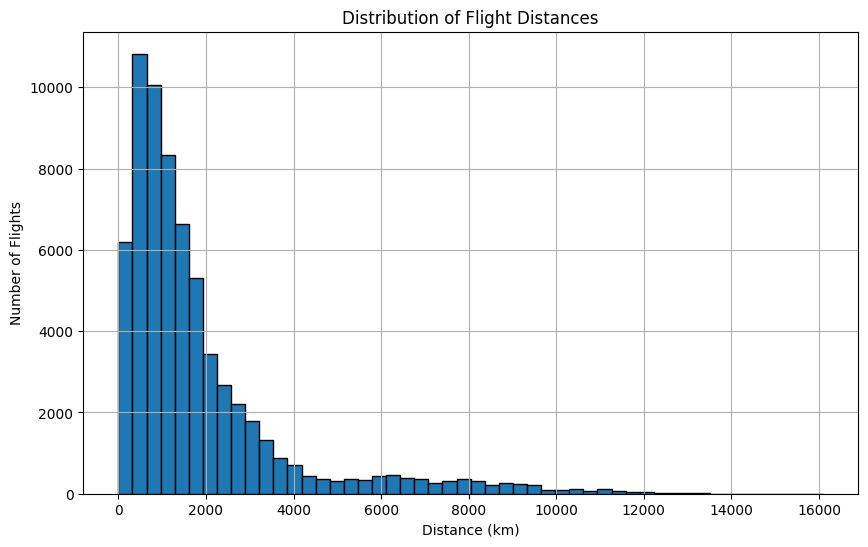

In [5]:
ff.distance_analysis()

### Step 3

Alex shifts focus to internal operations within a specific country, aiming to streamline domestic routes and improve the scheduling of internal flights.

**Methods Used**:
- `country_airports`: To plot and examine the locations of all airports within the country, understanding geographical spread.
- `plot_flights`: Focusing on a major airport, Alex plots all departing flights to assess the density and distribution of internal vs. international flights.
- `airport_info`: To get more context, alex gets detailde information about the airport.

c:\Users\vrank\ADPRO5\group_12\scripts\featherflight.py:194: FutureWarning: The geopandas.dataset module is deprecated and will be removed in GeoPandas 1.0. You can get the original 'naturalearth_lowres' data from https://www.naturalearthdata.com/downloads/110m-cultural-vectors/.
  world = gpd.read_file(gpd.datasets.get_path("naturalearth_lowres"))


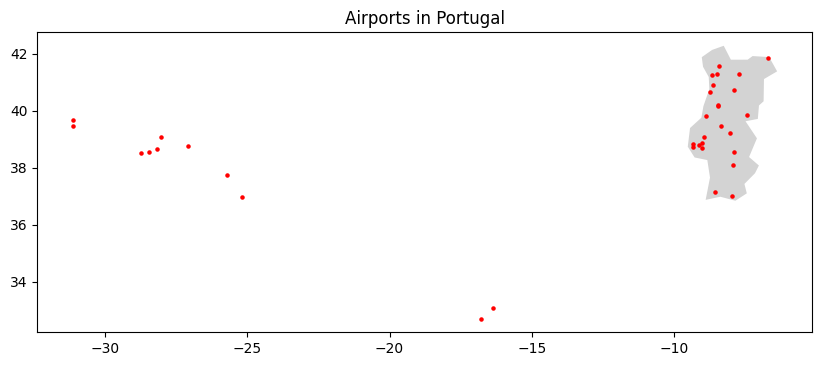

In [6]:
ff.country_airports('Portugal')

In [7]:
ff.airports.query('City == "Lisbon"')

,index,Airport ID,Name,City,Country,IATA,ICAO,Latitude,Longitude,Altitude,Timezone,DST,Tz database time zone,Type,Source,Point
1595,1595,1638,Humberto Delgado Airport (Lisbon Portela Airport),Lisbon,Portugal,LIS,LPPT,38.7813,-9.13592,374,0,E,Europe/Lisbon,airport,OurAirports,"(38.7813, -9.13592)"


c:\Users\vrank\ADPRO5\group_12\scripts\featherflight.py:293: FutureWarning: The geopandas.dataset module is deprecated and will be removed in GeoPandas 1.0. You can get the original 'naturalearth_lowres' data from https://www.naturalearthdata.com/downloads/110m-cultural-vectors/.
  world = gpd.read_file(gpd.datasets.get_path("naturalearth_lowres"))


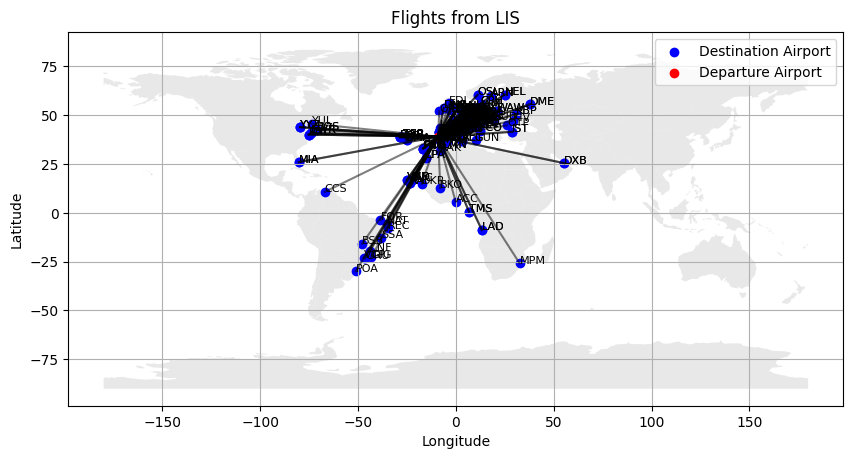

In [8]:
ff.plot_flights("LIS")

c:\Users\vrank\ADPRO5\group_12\scripts\featherflight.py:264: FutureWarning: The geopandas.dataset module is deprecated and will be removed in GeoPandas 1.0. You can get the original 'naturalearth_lowres' data from https://www.naturalearthdata.com/downloads/110m-cultural-vectors/.
  world = gpd.read_file(gpd.datasets.get_path("naturalearth_lowres"))
c:\Users\vrank\ADPRO5\group_12\scripts\featherflight.py:293: FutureWarning: The geopandas.dataset module is deprecated and will be removed in GeoPandas 1.0. You can get the original 'naturalearth_lowres' data from https://www.naturalearthdata.com/downloads/110m-cultural-vectors/.
  world = gpd.read_file(gpd.datasets.get_path("naturalearth_lowres"))


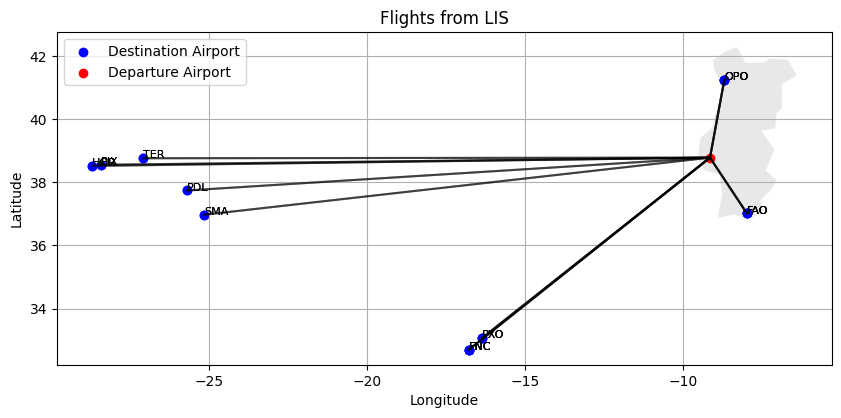

In [9]:
ff.plot_flights("LIS", internal=True)

In [10]:
ff.airport_info('LIS')

Airport Name: Humberto Delgado Airport (Lisbon Portela Airport)
Location: Lisbon, Portugal
IATA Code: LIS
ICAO Code: LPPT
Elevation: 114 feet
Runways: 2
Terminal: 1
Passenger Traffic: Approximately 31 million passengers annually
Airlines Served: Over 50 airlines operate at the airport
Facilities: Duty-free shops, restaurants, lounges, car rental services, and parking facilities
Transportation: Connected to the city center by metro, bus, taxi, and shuttle services


'Airport Name: Humberto Delgado Airport (Lisbon Portela Airport)\nLocation: Lisbon, Portugal\nIATA Code: LIS\nICAO Code: LPPT\nElevation: 114 feet\nRunways: 2\nTerminal: 1\nPassenger Traffic: Approximately 31 million passengers annually\nAirlines Served: Over 50 airlines operate at the airport\nFacilities: Duty-free shops, restaurants, lounges, car rental services, and parking facilities\nTransportation: Connected to the city center by metro, bus, taxi, and shuttle services'

### Step 4
The consultancy firm suggests that optimizing the fleet could lead to significant savings. Alex is tasked with identifying the most used airplane models and evaluating if they are the most efficient choices for the routes they serve.

**Method Used**:
- `plot_top_airplane_models`: To determine the top N airplane models used, potentially highlighting models that are over or under-utilized.

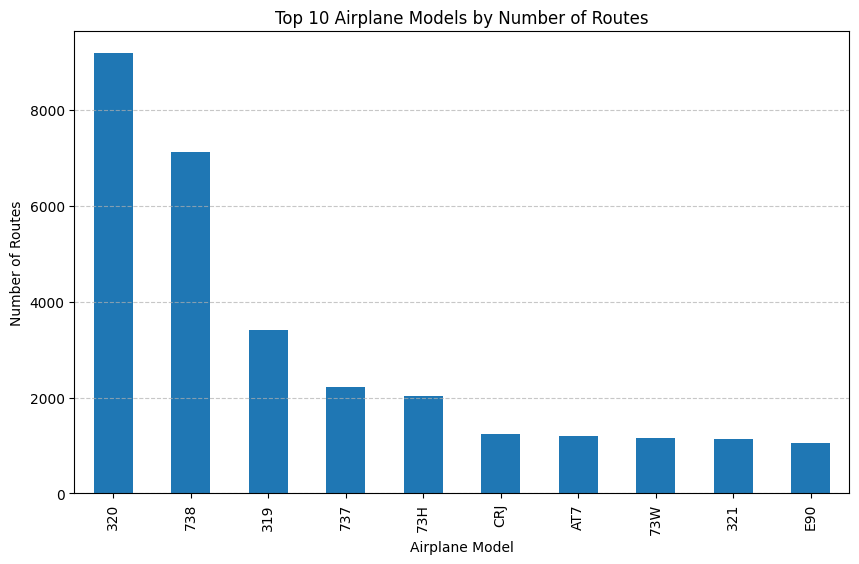

In [11]:
ff.plot_top_airplane_models(n_models=10)

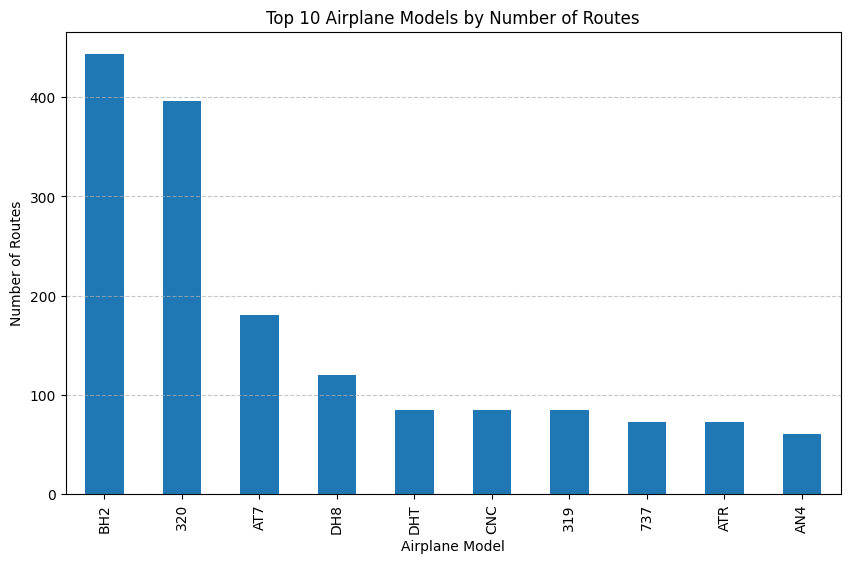

In [12]:
ff.plot_top_airplane_models(countries=['Portugal'], n_models=10)

### Step 5
As part of the client airline's expansion strategy into a new country, Alex is tasked with providing a comprehensive overview of the current flight operations within and departing from target countries. This analysis aims to identify potential opportunities and challenges for the client's operations in the new market.

To achieve this, the method visualizes all flights departing from the specified country, distinguishing between internal and international routes. This distinction allows for a detailed understanding of the country's air transportation network and its connectivity both domestically and internationally.

Furthermore, the method categorizes flights into short-haul and long-haul categories, with short-haul flights defined as those covering distances under 1000 kilometers. This classification provides insights into the distribution of flight distances within the country's network, crucial for strategic planning.

In addition to providing an overview of flight operations, the method calculates the potential decrease in flight emissions by replacing short-haul flights with rail services. By highlighting the environmental benefits of such a transition, it offers valuable insights for sustainable transportation alternatives.

Overall, this analysis equips the client with vital information regarding the existing flight landscape, including connectivity, distance distribution, and potential environmental impacts, empowering informed decision-making for their expansion endeavors.


**Method Used**:
- `plot_flights_from_country`: 
    This method visualizes all flights departing from the specified country, providing insights into the country's connectivity and potential for new routes. It distinguishes between internal and international flights to offer a comprehensive view of the country's air transportation network.

    Additionally, the method categorizes flights into short-haul and long-haul categories, providing information on the number of routes and the total distance covered by each category. This classification aids in understanding the distribution of flight distances within the country's network.

    Furthermore, the method calculates the potential reduction in flight emissions by replacing short-haul flights with rail services. By displaying this information, it highlights the environmental benefits achievable through alternative transportation modes.
    
    Overall, this method offers a detailed analysis of a country's flight network, including connectivity patterns, distance distribution, and potential environmental impacts, thereby assisting in strategic decision-making for transportation planning and infrastructure development.


In [13]:
import warnings
warnings.filterwarnings('ignore')
ff.plot_flights_from_country('Portugal')

In [14]:
ff.plot_flights_from_country('Portugal', internal=True)

### Step 6


In [15]:
# print all the airplanes
print(ff.aircrafts())

Found 246 airplane models ['Aerospatiale (Nord) 262', 'Aerospatiale (Sud Aviation) Se.210 Caravelle', 'Aerospatiale SN.601 Corvette', 'Aerospatiale/Alenia ATR 42-300', 'Aerospatiale/Alenia ATR 42-500', 'Aerospatiale/Alenia ATR 42-600', 'Aerospatiale/Alenia ATR 72', 'Airbus A300', 'Airbus A300-600', 'Airbus A300-600ST Super Transporter / Beluga', 'Airbus A310', 'Airbus A318', 'Airbus A319', 'Airbus A319neo', 'Airbus A320', 'Airbus A320neo', 'Airbus A321', 'Airbus A321neo', 'Airbus A330', 'Airbus A330-200', 'Airbus A330-300', 'Airbus A330-700 Beluga XL', 'Airbus A330-800neo', 'Airbus A330-900neo', 'Airbus A340', 'Airbus A340-200', 'Airbus A340-300', 'Airbus A340-500', 'Airbus A340-600', 'Airbus A350', 'Airbus A350-1000', 'Airbus A350-900', 'Airbus A380', 'Airbus A380-800', 'Antonov AN-12', 'Antonov AN-124 Ruslan', 'Antonov AN-140', 'Antonov An-148', 'Antonov An-158', 'Antonov An-225 Mriya', 'Antonov AN-24', 'Antonov AN-26', 'Antonov AN-28', 'Antonov AN-30', 'Antonov AN-32', 'Antonov AN-7

In [16]:
# checkng info Boeing 737 MAX 10
ff.aircraft_info('Boeing 737 MAX 10')

Specifications for Boeing 737 MAX 10:

1. Manufacturer: Boeing Commercial Airplanes
2. Role: Narrow-body jet airliner
3. Capacity: Up to 230 passengers
4. Length: 143 ft 8 in (43.8 m)
5. Wingspan: 117 ft 10 in (35.9 m)
6. Height: 41 ft 2 in (12.5 m)
7. Maximum Takeoff Weight: 194,700 lb (88,300 kg)
8. Range: 3,300 nmi (6,110 km)
9. Engines: CFM International LEAP-1B
10. Cruise Speed: Mach 0.79 (586 mph, 943 km/h)
11. First Flight: June 18, 2021
12. Introduction: Expected in 2023

Please note that specifications may vary depending on the specific configuration of the aircraft.


'Specifications for Boeing 737 MAX 10:\n\n1. Manufacturer: Boeing Commercial Airplanes\n2. Role: Narrow-body jet airliner\n3. Capacity: Up to 230 passengers\n4. Length: 143 ft 8 in (43.8 m)\n5. Wingspan: 117 ft 10 in (35.9 m)\n6. Height: 41 ft 2 in (12.5 m)\n7. Maximum Takeoff Weight: 194,700 lb (88,300 kg)\n8. Range: 3,300 nmi (6,110 km)\n9. Engines: CFM International LEAP-1B\n10. Cruise Speed: Mach 0.79 (586 mph, 943 km/h)\n11. First Flight: June 18, 2021\n12. Introduction: Expected in 2023\n\nPlease note that specifications may vary depending on the specific configuration of the aircraft.'